#### Part 1: concept setup
* current difficulties with semantic evaluation
* introducing proposed experiemtns and some considerations
#### Part 2: mathematical metrics
* a selection of metrics that can help - aggregations/dashboards/stats and string comparisons
#### Part 3: LLM on LLM
* using gpt to asses results
#### Part 4: user input & conclusion
* putting it all together and conclusion

#### See conclusion at bottom!!


# Is my semantic search any good? An open question.

There are many factors that can impact the performance of a semantic search engine. 

First of all, we can approach what performance means from various angles. One one hand, we can discuss technical benchmarks like processing speed, memory optimization, resource consumption, or costs; while on the other other hand, performance can mean accuracy, relevance, or user satisfaction with the retrieved results. 

With NLP or LLM models in general, the latter can be quite hard to asses. At least, in an automated way that is. While users could easily tell if the top search results are good enough, it can be quite difficult to score this with mathematical formulas. 

### Is the sky really blue?

For example, if we search for "what is the color of the sky" the results could be: "blue", "violet", "the same color as your friend Jess's eyes" or "The colors we see in the sky come from sunlight that is scattered by molecules in the atmosphere. This process is called Rayleigh scattering.". 

Which of these answer should the most performant search engine return? The most popular interpretation "blue", the technically correct "violet", the comprehensive science explanation, or the personal data and domain specific answer that was customized for this particular user? Not an easy choice, right?
And not to mention, this is a question that does have a clear "correct" solution. That is to say, we could label the answer to this query with the expected correct answer in our training dataset. 

In those cases, we can then still try to assess model performance (or in this case accuracy) with metrics like precision and recall. When we do know which answer(s) should be given, we can check if these were all fully or partially returned by the search engine, or which information was not retrieved. 

But this only works if we have labeled data, which is to say, if we program into our model what the correct result for each possible search would be. Then agian, if we knew this, we wouldn't need an AI engine after all. 

### Numbers don't tell the full story

This is a pretty common occurance with the NLP side of data science, which is to say the question of "how good is this semantic model?" is a pretty open one. The consensus is that, while some attempts at defining metrics exist (such as ()()()), in most cases the evaluation system relies heavily on human judgement. Studies define processes of users being promoted various model outputs and scoring them based on clearly defined metrics. 

Which is not to say this process doesn't still require a technical setup. To evaluate the performance of your semantic models, you would need to set up a pipeline that first performes feature engineering and hyperparameter tuning, defines and calculates helpful metrics, and aggregates result data in an easily comprehansible way. This is a great example of how AI and domain experts work together to solve a task!

The number crunching or mundane automation is as much as possible taken over by algorithms, providing the human in the loop the right context so they can provide the most valuable input. 

### How does this work in practice?

To quote the favorite dev response: "it depends". 

There are countless considerations to me made when designing a semantic solution:
Which models to pick, which parameters and features, which data split or sampling technique, which similarity score, etc. This is another part of the data science process that will probably not be replaced by automation any time soon. These answers will depend on the data domain, applicaition requirements, current state of the art or available tech stack, budget, personal preference, and much more. 

While we can't cover all of those in a guide, in this blog we will explore this "technical pipeline" we introduced earlier.

We will show an example of how we can pick a hypothesis, choose some parameters to tinker with, and follow through on a few types of automated tests and human interpretations to potentially decide "is this semantic model performant?". 

# TO DO

Section on "what is semantic search" / introducing Elastic

### TO DO 

Section on introducing langchain / what it menas in the LLM community / how it is easy to swap pieces in and out of your technical pipeline which means you can build once and, if needed, switch parts as the options available and best practices (quickly) change.


### TO DO

The hypothesis we picked for this blog: "Does document size influence the performance of the semantic search engine?" --> 

Introduce the concept of chunking - introduce the two main metrics when we talk about chunks - chunk size and overlap percentage. Define these. 

We will try a few model versions with different values and see if there is a perceptable difference in relevance for the results. Can we pick a winning strategy for our data? 

Introduce the idea that the answer could be no - there may not be a significant enough difference, or even if there is - the same won't work for a different dataset or project so you would have to run these tests (and probably other) each time you start working with NLP.



In [ ]:
from datasets import load_dataset
import numpy as np
dataset = load_dataset("reuters21578", 'ModHayes', split="train")
dataset

### Exploring sentence length - an intuitive first try

In [91]:
def avg_str_len(lst):
    return np.mean([len(s) for s in lst])

example_doc = dataset[0]['text'] + dataset[1]['text']
example_doc = example_doc.replace("\n", " ")
example_doc = example_doc.replace("Reuter", " ")

print(f"The first two documents have {len(example_doc)} charaters")

example_sentence = example_doc.split(". ")
print(f"We can split it into {len(example_sentence)} sentences, with an average of {np.round(avg_str_len(example_sentence), 2)} characters")

example_paragraph = example_doc.split("     ")
paragraph_length = len(example_paragraph)
print(f"Or we can split it into {paragraph_length} paragraphs, with an average of {np.round(avg_str_len(example_paragraph), 2)} charaters")

example_chunk = [example_paragraph[i] + example_paragraph[i+1] + example_paragraph[i+2] for i in range(0, paragraph_length-2,3)]
print(f"Finally, we take {len(example_chunk)} chunks of two paragraphs each, averaging about {np.round(avg_str_len(example_chunk), 2)} characters")

The first two documents have 3291 charaters
We can split it into 24 sentences, with an average of 135.21 characters
Or we can split it into 20 paragraphs, with an average of 159.8 charaters
Finally, we take 6 chunks of two paragraphs each, averaging about 508.33 characters


In [92]:
print("For example, from the first document we can get these different sections depenging on the split: ")
print(f"One sentence of {len(example_sentence[3])} characters: \n{example_sentence[3]}")
print(f"One paragraph of {len(example_paragraph[2])} characters: \n{example_paragraph[2]}")
print(f"One larger chunk of {len(example_chunk[0])} characters: \n{example_chunk[0]}")

For example, from the first document we can get these different sections depenging on the split: 
One sentence of 95 characters: 
Again it seems that cocoa delivered earlier on consignment was included in the arrivals figures
One paragraph of 261 characters: 
Arrivals for the week ended February 22 were 155,221 bags of 60 kilos making a cumulative total for the season of 5.93 mln against 5.81 at the same stage last year. Again it seems that cocoa delivered earlier on consignment was included in the arrivals figures.
One larger chunk of 573 characters: 
Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming temporao, although normal humidity levels have not been restored, Comissaria Smith said in its weekly review.The dry period means the temporao will be late this year.Arrivals for the week ended February 22 were 155,221 bags of 60 kilos making a cumulative total for the season of 5.93 mln agains

### We can do this in a systematic way. (link to current chunking article on searchlabs)

In [135]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


#trying out a few examples with chunking - similar to the examples before

def split_by_chunk(documents, chunk, metadata):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk,
        chunk_overlap=chunk/5,
        length_function=len,
        is_separator_regex=False,
        keep_separator=False,
        separators = ["     ", ". ", " ", ""]
    )

    texts = text_splitter.create_documents(documents, metadatas=metadata)
    return texts

texts = split_by_chunk([example_doc], 150, None)
print(texts[0])

texts = split_by_chunk([example_doc], 300, None)
print(texts[0])

texts = split_by_chunk([example_doc], 600, None)
print(texts[0])


page_content='Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming'
page_content='Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming temporao, although normal humidity levels have not been restored, Comissaria Smith said in its weekly review.'
page_content='Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming temporao, although normal humidity levels have not been restored, Comissaria Smith said in its weekly review.     The dry period means the temporao will be late this year.     Arrivals for the week ended February 22 were 155,221 bags of 60 kilos making a cumulative total for the season of 5.93 mln against 5.81 at the same stage last year. Again it seems that cocoa delivered earlier on consignment was incl

## Now let's bring elastic into it

We use the elasticsearch functions from langchain - not the elastic client itself 

--> this blog is great for data scientstis who can add whatever prefered integrations they want to this technical pipeline. 

### TO DO

Add a section or reference to one of the other notebooks / blogs on how elastic indeces work; etc - this is prerequisite knowledge that we won't spend time on. Our focus is tuning our semantic search model

In [ ]:
! pip install --upgrade --quiet  elasticsearch langchain-openai tiktoken langchain

In [ ]:
#In one go:

model_id = "sentence-transformers__msmarco-minilm-l-12-v3"

ELASTIC_CLOUD_ID = getpass("Elastic Cloud ID: ")
ELASTIC_API_KEY = getpass("Elastic API Key: ")

dataset = load_dataset("reuters21578", 'ModHayes', split="train[:1%]")

In [282]:
def create_index_with_chunk(db, index_name, chunk_size, chunk_overlap_part):
    db.client.ingest.put_pipeline(
        id="embeddings",
        processors=[
            {
                "inference": {
                    "model_id": model_id,
                    "field_map": {"_ingest._value.page_content": "text_field"},
                    "target_field": "vector_query_field",
                }
            }
        ],
    )

    db.client.indices.create(
        index=index_name,
        mappings={
            "dynamic": "true",
            "properties": {
                "vector_query_field": {
                    "properties": {
                        "predicted_value": {
                            "type": "dense_vector",
                            "dims": 384,
                            "index": True,
                            "similarity": "cosine",
                        }
                    }
                },
                "name" :{"type": "text"}, 
            }
        },
        settings={"index": {"default_pipeline": "embeddings", "refresh_interval" : "1000s"}},
    )

    metadata = []
    content = []

    for doc in dataset:
        content.append(doc["text"])
        metadata.append({
            "name": doc["title"]
        })

    #docs = split_by_chunk(documents=content, chunk=chunk_size, metadata = metadata)
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_size/chunk_overlap_part,
        length_function=len,
        is_separator_regex=False,
        keep_separator=False,
        separators = ["     ", ". ", " ", ""]
    )

    docs = text_splitter.create_documents(content, metadata)

    db.from_documents(
        docs,
        es_cloud_id=ELASTIC_CLOUD_ID,
        es_api_key=ELASTIC_API_KEY,
        index_name=index_name,
        query_field="text_field",
        vector_query_field="vector_query_field.predicted_value",
        strategy=ElasticsearchStore.ApproxRetrievalStrategy(
            query_model_id=model_id
        ),
    )

### Picking a few parameter values

For this experiment we will take 3 chunk sizes, 3 overlap strategies, and test the data on four quesitons (based on the topics found in the reuters dataset). 

### TO DO 
Give more explanation on this.

In [294]:
chunk_sizes = [600, 300, 150]
chunk_overlap_parts = [2, 5, 10]

list = ["how is grain production affected by weather", 
        "countries performing well in the stock market",
        "projection for crude oil demand", 
        "rising unemployment concerns"]

results = {}

for chunk in chunk_sizes:
    chunk_responses = {}
    for chunk_overlap_part in chunk_overlap_parts:
        overlap_reponse = []
        
        index_name = "reuters_" + str(chunk) + "_" + str(chunk_overlap_part)

        db = ElasticsearchStore(
            es_cloud_id=ELASTIC_CLOUD_ID,
            es_api_key=ELASTIC_API_KEY,
            index_name=index_name,
            query_field="text_field",
            vector_query_field="vector_query_field.predicted_value",
            strategy=ElasticsearchStore.ApproxRetrievalStrategy(
                    query_model_id=model_id
        ),
        )

        create_index_with_chunk(db, index_name, chunk, chunk_overlap_part)

        for query in list:
            query_response = {}
            response = db.similarity_search(query, k=8)
            query_response["query"] = query
            answers = []
            for doc in response:
                answers.append({'name' : doc.metadata["name"], 'content': doc.page_content})
            
            query_response["answers"] = answers
            overlap_reponse.append(query_response)
        
        chunk_responses[chunk_overlap_part] = overlap_reponse
    results[chunk] = chunk_responses

Saving the results

In [295]:
import json
with open('result.json', 'w') as fp:
    json.dump(results, fp)

In [366]:
with open('result.json') as f:
    results = json.load(f)

## Looking at our results

We have a list of 4 questions, and a total of 9 parameter combinations; thus resulting in 9 lists of relevant search results per question. 

We can get some initial statistics about our responses, before we dive deeper into some representative examples.


How to navigate the dictionary:

results[chunk][overlap][question_number]["query"] or list[question_number]

results[chunk][overlap][question_number]["answers"][answer_rank]["name"]

chunk_sizes = [600, 300, 150]
chunk_overlap_parts = [2, 5, 10]

list = ["how is grain production affected by weather", 
        "countries performing well in the stock market",
        "projection for crude oil demand", 
        "rising unemployment concerns"]

### Computing some useful metrics

While the judgement of the relevance of these search results will mostly rely on human interpretation; we can create some helper metrics to give context to the differences between the models. 

### Is the top ranked result consistent?
For example, we can see if the various models returned the same article as the top results for a query. This can increase confidence in the result that one retrieved document is constantly ranked number one across models. On the other hand, if multiple articles are retrieved - we can compare which of the models is better tuned, comparing to the article the human would find most relevant. Calling back to the concept of precision and recall mentioned earlier - if we have familiarity with the entire dataset and know for sure what all the relevant articles to each question is, we can calculate precision and recall for each model. In this case, since the dataset is so large and the user couldn't have read and personally categorized all articles - we are working on the assumption of unlabeled data. 

### The same result, different versions
Another technique could be to look at how similar the responses are from a string comparison perspective. If multiple models returned the same article, they may have still returned different segments of it, depending on the chunk size and overlap we picked. Or do they all focus on the same paragrapj? Again, a consensus could mean a stronger confidence in the results, while differences could lead to picking one model as "better" than the others.

With the difflib library we can generate a similarity score between two strings - where a score of 1 means they are identical and a score of 0 means they don't have any subsets of strings in common. We can then plot a custom heatmap to show similarity between all responses for a particular quesiton - similar to the concept of a correlation matrix.



In [346]:
import difflib

article_answers = {}
articles = []
for question_number in range(4):
    response_titles = {}
    response_articles = []
    for chunk in chunk_sizes:
        for overlap in chunk_overlap_parts:
            first_article_name = results[chunk][overlap][question_number]["answers"][0]["name"]
            response_articles.append(results[chunk][overlap][question_number]["answers"][0]["content"])
            if first_article_name in response_titles:
                response_titles[first_article_name] += 1
            else:
                response_titles[first_article_name] = 1
    article_answers[list[question_number]] = response_titles
    articles.append(response_articles)


In [342]:
article_answers 

{'how is grain production affected by weather': {'U.S. GRAIN CARLOADINGS FALL IN WEEK': 9},
 'countries performing well in the stock market': {'U.S. DATA POINT TO CAPITAL SPENDING SLOWDOWN': 6,
  'BAHIA COCOA REVIEW': 1,
  'SWISS ECONOMY IN EXCELLENT CONDITION, OECD SAYS': 1,
  'OPEC MAY HAVE TO MEET TO FIRM PRICES - ANALYSTS': 1},
 'projection for crude oil demand': {'OPEC MAY HAVE TO MEET TO FIRM PRICES - ANALYSTS': 6,
  'MARATHON PETROLEUM REDUCES CRUDE POSTINGS': 2,
  'ICO PRODUCERS TO PRESENT NEW COFFEE PROPOSAL': 1},
 'rising unemployment concerns': {'SWISS ECONOMY IN EXCELLENT CONDITION, OECD SAYS': 4,
  'FRANCE FACES PRESSUE TO CHANGE POLICIES': 5}}

We get back between 1 and 4 articles as a top result from the 9 models. For question 1 the top ranked article is unanimous across models; whicle question two answers are more diverse. Paricularily, it seems models with a smaller chunk size have more variety in responses wheras models that retrieve bigger paragraphs tend to find the answer in the same texts.

We will further analyze a selectoin of these questions to dig dipper into the results.

For the first question - if all models returned the same article, how does the selected section differ? 

For the other quesitons - do the answers still have any overlapping information?

In [348]:
import pandas as pd
df = pd.DataFrame(articles)
# converting our results to a dataframe to have access to more common mathematical tools for exploration

In [397]:
df

/Users/iulia/python/reuters_semantic_search/.venv/lib/python3.11/site-packages/IPython/core/formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,0,1,2,3,4,5,6,7,8
0,"U.S. grain carloadings totaled 26,108\ncars in...","U.S. grain carloadings totaled 26,108\ncars in...","U.S. grain carloadings totaled 26,108\ncars in...",the Association of American Railroads reported...,"grain carloadings totaled 26,108\ncars in the ...","grain carloadings totaled 26,108\ncars in the ...","a year\nago, the Association of American Railr...","above the corresponding week a year\nago, the ...","week a year\nago, the Association of American ..."
1,"""The\neconomy has a weakening bent to it early...","""The\neconomy has a weakening bent to it early...","""The\neconomy has a weakening bent to it early...","""The\neconomy has a weakening bent to it early...","""The\neconomy has a weakening bent to it early...","""The\neconomy has a weakening bent to it early...","Destinations were the U.S., Covertible currenc...",this year\nafter vigorous growth in 1986.\n Bu...,Inc.\n He said the market's earlier optimism a...
2,of Petroleum Analysis Ltd in New York.\n But B...,Marathon Petroleum Co said it reduced\nthe con...,Marathon Petroleum Co said it reduced\nthe con...,"the 15.8 mln bpd quota set last December.\n ""O...",Policy Center said that the demand for OPEC oi...,"International Coffee Organization, ICO,\nprodu...",Petroleum Analysis Ltd in New York.\n But Bija...,"its production.\n ""Demand for their (OPEC) oil...",University's Energy\nand Environment Policy Ce...
3,and monetary policies followed by the governme...,"in\ninflation this year, but said these gave n...",for concern.\n The study forecast a decline in...,"power of their members, raising\nthe spectre o...","group, put similar demands to Chirac\nearlier ...",to Chirac\nearlier in the week while the Commu...,rising unemployment to reflate the economy lat...,"But ""given Switzerland's large external surplu...",top priority.\n But with unemployment nearing ...


In [406]:
#computing score matrix between answers to find string similarities
def answer_similarity_scores(question_number):
    scores = np.zeros((9,9))
    for i in range(9):
        for j in range(9):
            s = difflib.SequenceMatcher(None, df.iloc[question_number][i], df.iloc[question_number][j])
            score = round(s.ratio(), 3)
            scores[i][j] = score
            scores[j][i] = score
    return scores 

scores0 = answer_similarity_scores(0)
scores1 = answer_similarity_scores(1)
scores3 = answer_similarity_scores(3)


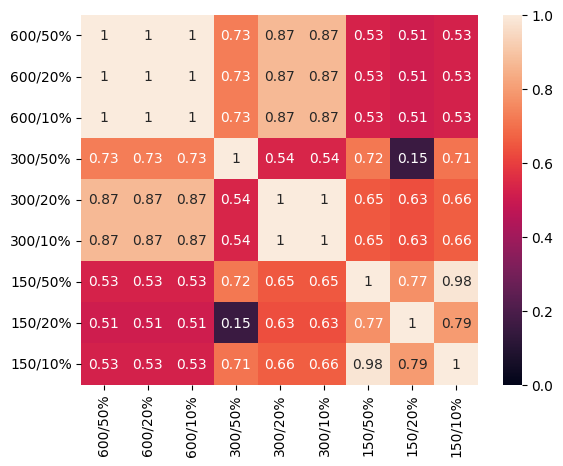

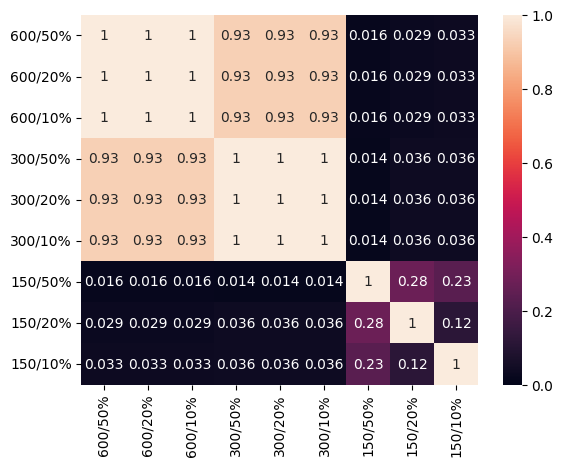

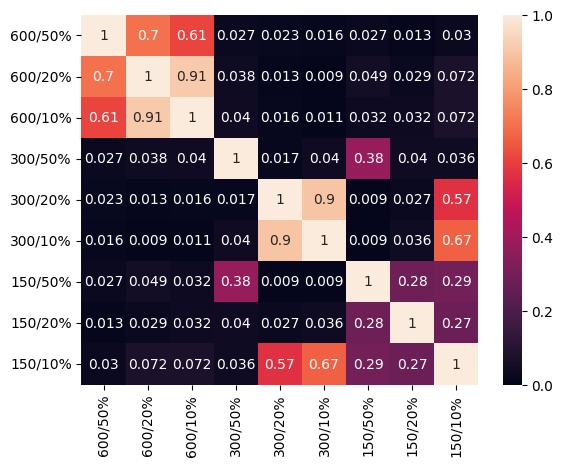

In [407]:
# computing heatmap based on relations between all answers to the same question - how much overlap do they have?
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["600/50%", "600/20%", "600/10%", "300/50%", "300/20%", "300/10%", "150/50%", "150/20%", "150/10%" ]

ax1 = sns.heatmap(scores0, vmin=0, vmax=1, annot=True, xticklabels = labels, yticklabels = labels)
plt.show()
ax2 = sns.heatmap(scores1, vmin=0, vmax=1, annot=True, xticklabels = labels, yticklabels = labels)
plt.show()
ax3 = sns.heatmap(scores3, vmin=0, vmax=1, annot=True, xticklabels = labels, yticklabels = labels)
plt.show()

### Result deepdive
We can distinctly see the three groups of three models emerging: it seems the different overlap percentage has a smaller influence on string difference than the chunk size. It seems especially on the largest chunk size of 600 characters - the answers given by the three models in this category are almost identical (score of almost 1). 

There doesn't seem to be a similarity between models with the same overlap parameter regardles of chunk size.

On the other side, when the chunk size is reduced to 150 characters, it seems the model retrieve vastly different answers depending on overlap size, almost as if the models are not completely different. 

This could mean that a higher chunk size will give more uniform results. However, to asses if this is a good or bad thing we still need user input. Is the "consistent" result as accurate as it can be? Or do the shorter answers give more accurate responses?

We can try one more technique before we pass it over to user interpretaiton. 

## Langchain LLM Chain Evaluator

Langchain comes with its own set of evaluators for LLM projects. However, these are mainly aimed at evaluating generative models rather than retrieving tasks. Nonetheless, we can still add this as a step in our pipeline to see if there is any meaningful information to be gained.

The chain comparison evaluator uses gpt4 to compare two responses to the same input query and choose a "winner". We will try to compare the top response provided by different models to the same query.

In [322]:
from langchain.evaluation import load_evaluator
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()

evaluator = load_evaluator("pairwise_string", llm=llm)

evaluator.evaluate_string_pairs(
    prediction=results[600][2][0]["answers"][0]["content"],
    prediction_b=results[150][10][0]["answers"][0]["content"],
    input=results[600][2][0]["query"],
)


This chain was only tested with GPT-4. Performance may be significantly worse with other models.


{'reasoning': "Assistant A's response is completely unrelated and irrelevant to the user's question about how grain production is affected by weather. It provides information about U.S. grain carloadings and grain mill product loadings, which is not helpful or insightful in answering the user's question. The response lacks depth of thought and does not address the user's inquiry at all.\n\nAssistant B's response is also unrelated and irrelevant to the user's question. It provides incomplete and fragmented information about U.S. grain carloadings and grain mill product loadings, which has no relevance to the user's question about the impact of weather on grain production. The response does not demonstrate depth of thought and fails to address the user's inquiry.\n\nNeither Assistant A nor Assistant B provide any relevant or helpful information about how grain production is affected by weather. Therefore, the correct verdict is:\n\n[[C]]",
 'value': None,
 'score': 0.5}

It seems our retrieved documents are not considered a good answer at all. This is likely due to the fact the the evaluator isn't meant for this type of task, or perhaps different metrics could still yield a better response from this technique. We can try a few more examples.

In [408]:
import random

print()

def predict_preferences(chunk1, overlap1, chunk2, overlap2, results) -> list:
    preferences = []

    for i in range(len(list)):
        #input_ = example["inputs"]
        input_ = results[chunk1][overlap1][i]["query"]
        # Flip a coin to reduce persistent position bias
        res_a = results[chunk1][overlap1][i]["answers"][0]["content"]
        res_b = results[chunk2][overlap2][i]["answers"][0]["content"]
        if random.random() < 0.5:
            pred_a, pred_b = res_a, res_b
            a, b = "a", "b"
        else:
            pred_a, pred_b = res_b, res_a
            a, b = "b", "a"
        eval_res = evaluator.evaluate_string_pairs(
            prediction= pred_a,
            prediction_b= pred_b,
            input=input_,
        )
        if eval_res["value"] == "A":
            preferences.append(a)
        elif eval_res["value"] == "B":
            preferences.append(b)
        else:
            preferences.append(None)  # No preference
    return preferences

In [ ]:
'''
We will compare examples from two models, namely chunk 600 with 50% overlap and chunk 150 with 50% overlap.
'''
preferences = predict_preferences(600, 2, 150, 2, results)

In [335]:
from collections import Counter

name_map = {
    "a": "Chunk of 600 characters with 50% overlap",
    "b": "Chunk of 150 characters with 50% overlap",
}
counts = Counter(preferences)
pref_ratios = {k: v / len(preferences) for k, v in counts.items()}
for k, v in pref_ratios.items():
    print(f"{name_map.get(k)}: {v:.2%}")

Chunk of 600 characters with 50% overlap: 75.00%
None: 25.00%


In [337]:
'''
We will compare examples from two models, namely chunk 600 with 50% overlap and chunk 300 with 10% overlap.
'''
preferences = predict_preferences(600, 2, 300, 10, results)

name_map = {
    "a": "Chunk of 600 characters with 50% overlap",
    "b": "Chunk of 300 characters with 10% overlap",
}
counts = Counter(preferences)
pref_ratios = {k: v / len(preferences) for k, v in counts.items()}
for k, v in pref_ratios.items():
    print(f"{name_map.get(k)}: {v:.2%}")

how is grain production affected by weather
countries performing well in the stock market
projection for crude oil demand
rising unemployment concerns
None: 100.00%


In [338]:
'''
We will compare examples from two models, namely chunk 600 with 50% overlap and chunk 600 with 10% overlap.
'''
preferences = predict_preferences(600, 2, 600, 10, results)

name_map = {
    "a": "Chunk of 600 characters with 50% overlap",
    "b": "Chunk of 600 characters with 10% overlap",
}
counts = Counter(preferences)
pref_ratios = {k: v / len(preferences) for k, v in counts.items()}
for k, v in pref_ratios.items():
    print(f"{name_map.get(k)}: {v:.2%}")

how is grain production affected by weather
countries performing well in the stock market
projection for crude oil demand
rising unemployment concerns
None: 100.00%


### Is something better than nothing?

Most of the time gpt4 chooses "None" over either model's response. 
Therefore we can conclude this step isn't very helpful for this particular technical pipeline.

###

### TO DO 

Add the final human conclusion - can we pick a model over the other?

## TO DO Conclusion

The main point of this blog is:
* there are many data science considerations to be made when working with NLP
  * as much as current tools make it easier to use LLMs out of the box; performance and relevance will always rely on how these are implemented. 
* there are many techniques on how to optimize LLMs, both in literature and in terms of tools in the ecosystem. 
  * Some may be better suited for a task than others, and as always
  * experts still need to interprpet the results
* hypothesis and testing are a core part of developing such models. 
  * there is something to be said about the value of experimenting. 
  * Were the tasks we chose for this blog the best options? 
  * Did they give us a clear winner from the models? 
    * Maybe not. And that's what the answer may often be when doing these kind of tests. Doesn't make them any less valuable.
* Data science & research as a starting point / perspective vs out of the box solutions. 
  * Find the right balance.